# Execution Probability - P4 - Cancel Orders (Renewed)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Extracting Cancel Order Quantities

In [3]:
cancel_orders = pd.read_csv('Quantities/cancel_ratios.csv')

# Haftalik ortalama, 15 tickdeki cancel ratiolari
cancel_buy_orders_ratio_weekly = []
cancel_sell_orders_ratio_weekly = []
# -----------------------------------------------

weeks_in_months = [
    range(0,7,2),
    range(8,17,2),
    range(18,27,2),
    range(28,37,2),
    range(38,41,2),
    range(42,49,2),
    range(50,59,2),
    range(60,69,2),
    range(70,79,2)
]

days_in_week = [4, 5, 5, 5, 2, 4, 5, 5, 5]
days_in_months = [21, 19]
week_number = 9

for week in weeks_in_months:
    week_cb = []
    week_cs = []
    
    for day in week:
        week_cb.append(list(map(float,cancel_orders.as_matrix()[day][1:])))
        week_cs.append(list(map(float,cancel_orders.as_matrix()[day+1][1:])))
    
    cancel_buy_orders_ratio_weekly.append(list(map(float, np.mean(np.array(week_cb), axis = 0))))
    cancel_sell_orders_ratio_weekly.append(list(map(float, np.mean(np.array(week_cs), axis=0))))

## Weekly & Monthly Mean of Cancel Buy Ratios in Ticks

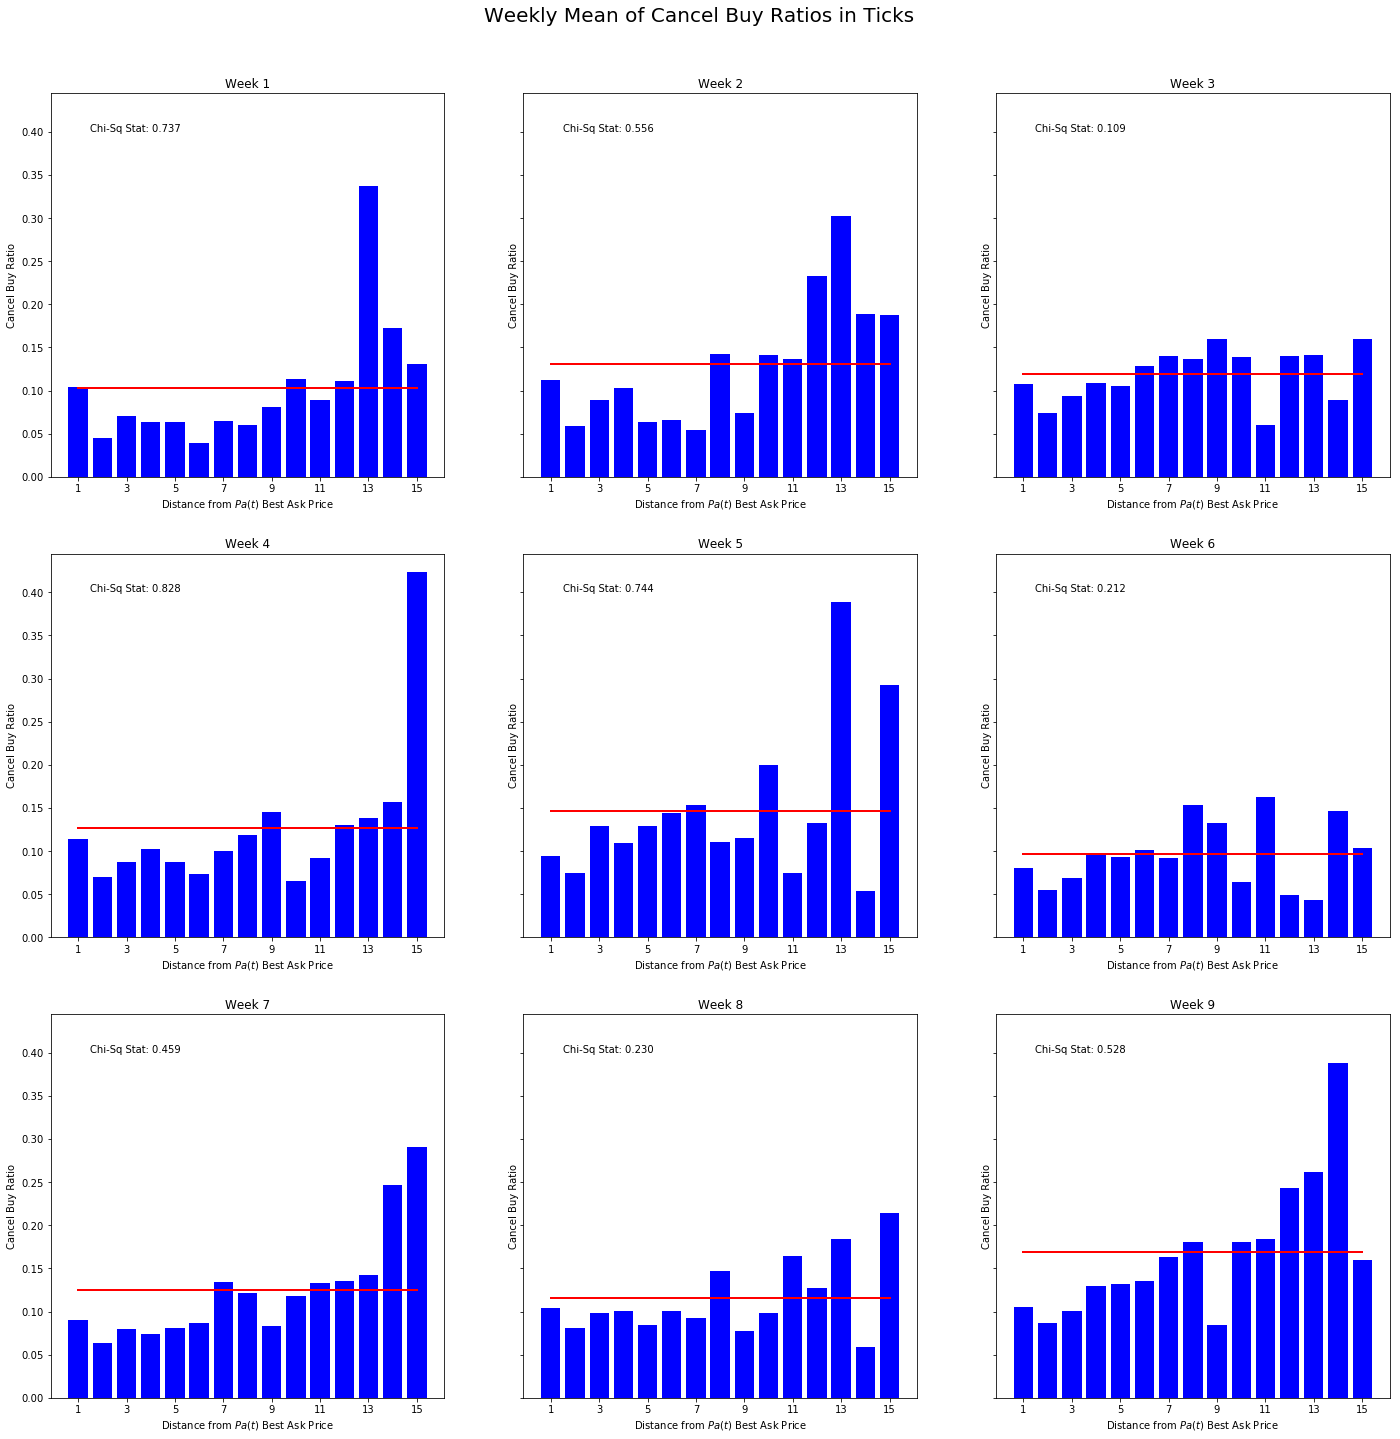

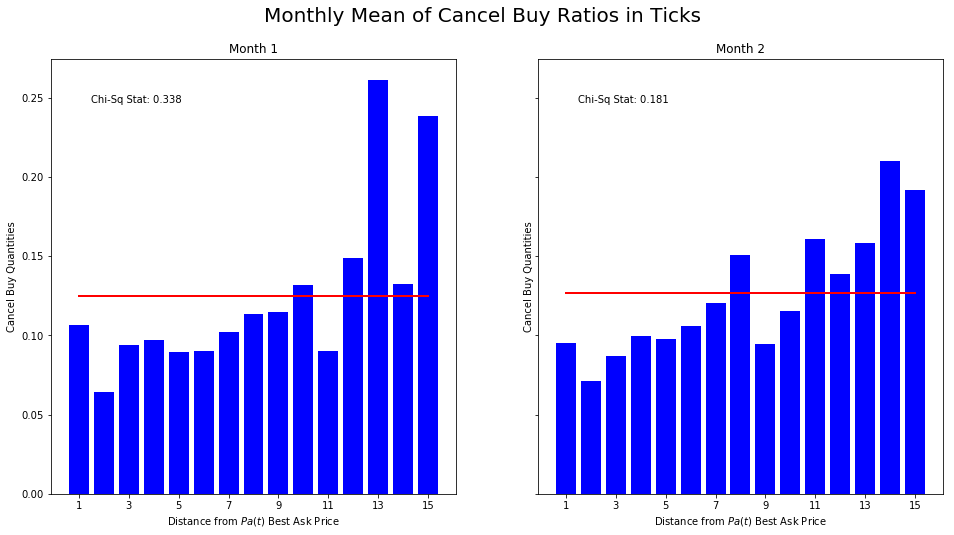

In [38]:
X = np.arange(1,16)
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,24))
f.suptitle('Weekly Mean of Cancel Buy Ratios in Ticks', fontsize=20, y = 0.93)
k = 0

for i in range(3):
    for j in range(3):
        temp = [np.mean(cancel_buy_orders_ratio_weekly[k]) for x in range(15)]
        axes[i, j].bar(X, cancel_buy_orders_ratio_weekly[k], color='b')
        axes[i, j].plot(X, temp, color='r', linewidth=2)
        axes[i, j].set_ylabel('Cancel Buy Ratio')
        axes[i, j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j].title.set_text('Week ' + str(k+1))
        axes[i, j].set_xticks(np.arange(1,16,2))
        
        # Calculating Chi Sq test
        
        mean_val = np.mean(cancel_buy_orders_ratio_weekly[k])
        chisq_stat = np.sum(((np.array(cancel_buy_orders_ratio_weekly[k]) - mean_val) ** 2)/mean_val)

        plt.text(0.1, 0.9,'Chi-Sq Stat: {:.3f}'.format(chisq_stat),
             transform = axes[i,j].transAxes)
        
                           
        
        k += 1 
        
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))
f.suptitle('Monthly Mean of Cancel Buy Ratios in Ticks', fontsize=20, y = 0.97)
k = 0

result = np.mean(np.array(cancel_buy_orders_ratio_weekly[0:5]), axis = 0)

for i in range(2):
    temp = [np.mean(result) for x in range(15)]
    axes[i].bar(X, result, color='b')
    axes[i].plot(X, temp, color='r', linewidth=2)
    axes[i].set_ylabel('Cancel Buy Quantities')
    axes[i].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
    axes[i].title.set_text('Month ' + str(i+1))
    axes[i].set_xticks(np.arange(1,16,2))
    
    # Calculating Chi Sq test
        
    mean_val = np.mean(result)
    chisq_stat = np.sum(((np.array(result) - mean_val) ** 2)/mean_val)

    plt.text(0.1, 0.9,'Chi-Sq Stat: {:.3f}'.format(chisq_stat),
             transform = axes[i].transAxes)
    
    result = np.mean(np.array(cancel_buy_orders_ratio_weekly[5:9]), axis = 0)

## Weekly & Monthly Mean of Cancel Sell Ratios in Ticks

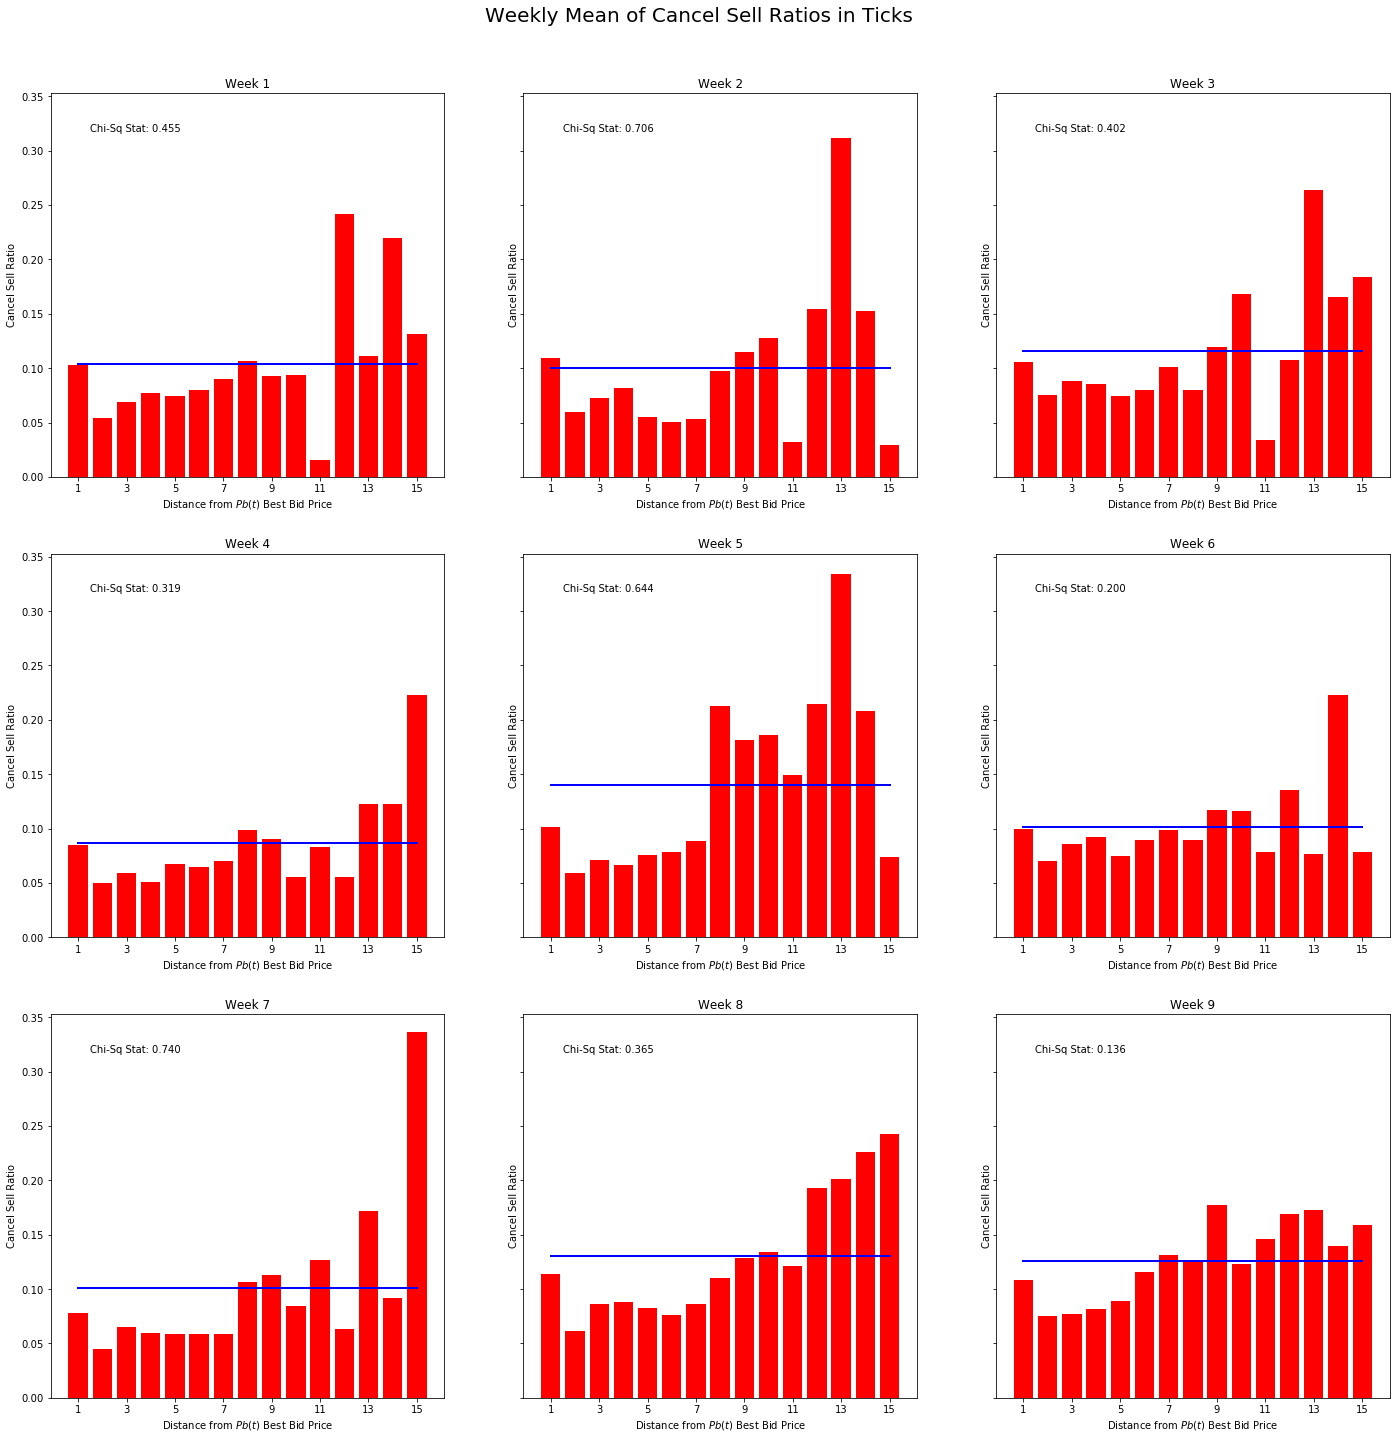

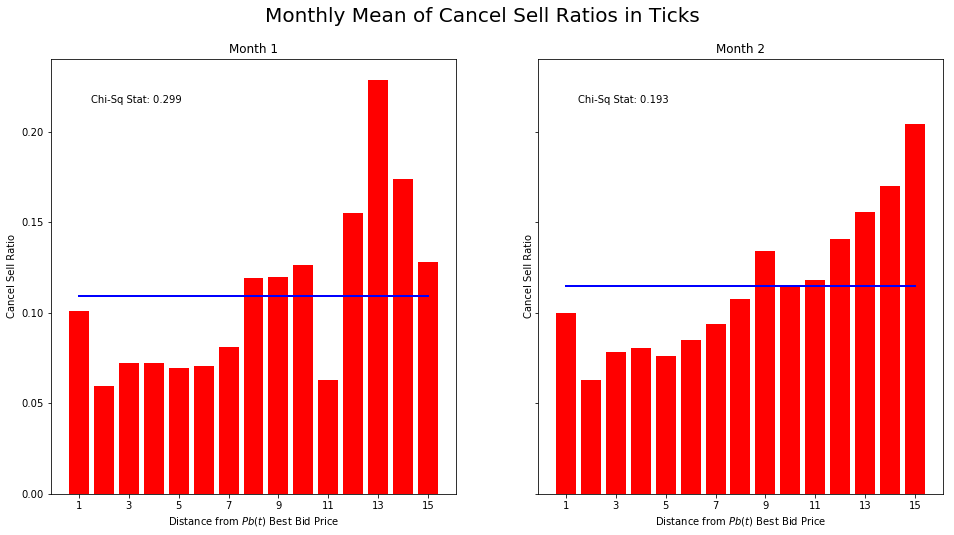

In [39]:
X = np.arange(1,16)
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,24))
f.suptitle('Weekly Mean of Cancel Sell Ratios in Ticks', fontsize=20, y = 0.93)
k = 0

for i in range(3):
    for j in range(3):
        temp = [np.mean(cancel_sell_orders_ratio_weekly[k]) for x in range(15)]
        axes[i, j].bar(X, cancel_sell_orders_ratio_weekly[k], color='r')
        axes[i, j].plot(X, temp, color='b', linewidth=2)
        axes[i, j].set_ylabel('Cancel Sell Ratio')
        axes[i, j].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
        axes[i, j].title.set_text('Week ' + str(k+1))
        axes[i, j].set_xticks(np.arange(1,16,2))
        
        # Calculating Chi Sq test
        
        mean_val = np.mean(cancel_sell_orders_ratio_weekly[k])
        chisq_stat = np.sum(((np.array(cancel_sell_orders_ratio_weekly[k]) - mean_val) ** 2)/mean_val)

        plt.text(0.1, 0.9,'Chi-Sq Stat: {:.3f}'.format(chisq_stat),
             transform = axes[i,j].transAxes)
        
        k += 1 
        
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))
f.suptitle('Monthly Mean of Cancel Sell Ratios in Ticks', fontsize=20, y = 0.97)
k = 0

result = np.mean(np.array(cancel_sell_orders_ratio_weekly[0:5]), axis = 0)

for i in range(2):
    temp = [np.mean(result) for x in range(15)]
    axes[i].bar(X, result, color='r')
    axes[i].plot(X, temp, color='b', linewidth=2)
    axes[i].set_ylabel('Cancel Sell Ratio')
    axes[i].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
    axes[i].title.set_text('Month ' + str(i+1))
    axes[i].set_xticks(np.arange(1,16,2))
    
    # Calculating Chi Sq test
        
    mean_val = np.mean(result)
    chisq_stat = np.sum(((np.array(result) - mean_val) ** 2)/mean_val)

    plt.text(0.1, 0.9,'Chi-Sq Stat: {:.3f}'.format(chisq_stat),
             transform = axes[i].transAxes)
    
    result = np.mean(np.array(cancel_sell_orders_ratio_weekly[5:9]), axis = 0)